#Skin Cancer Detector

O projeto conta com a criação de uma rede neural capaz de realizar o aprendizado de máquina e reconhecimento de padrões para identificar e classificar uma imagem de lesão de pele baseado em 7 principais tipos:
- Nevo melanocítico: Distúrbio geralmente não cancerígeno das células da pele produtoras de pigmento, comumente chamado de marcas de nascença ou pintas.
- Melanoma: O tipo mais grave de câncer de pele. O melanoma ocorre quando as células produtoras dos pigmentos que dão cor à pele tornam-se cancerígenas.
- Verruga seborreica: Condição de pele benigna com aspecto de um nódulo maleável de cor castanha, preta ou marrom.
A ceratose seborreica é um dos tumores de pele benignos mais comuns em idosos. Embora existam casos de tumores individuais, a presença de vários tumores é mais comum.
-  Carcinoma basocelular: Tipo de câncer de pele que começa nas células basais.
As células basais produzem novas células da pele conforme as antigas morrem. Limitar a exposição ao sol pode ajudar a evitar que essas células se tornem cancerígenas.
Esse tipo de câncer geralmente aparece como um nódulo de cera branco ou uma mancha escamosa marrom em áreas expostas ao sol, como rosto e pescoço.
-  Ceratose actínica: Mancha escamosa áspera na pele causada por anos de exposição ao sol.
A ceratose actínica geralmente afeta idosos. Reduzir a exposição ao sol pode ajudar a diminuir o risco.
É mais comum no rosto, nos lábios, nas orelhas, no dorso das mãos, nos antebraços, no couro cabeludo e no pescoço. A pele escamosa e áspera aumenta lentamente e não costuma causar outros sinais ou sintomas. A lesão pode levar anos para se desenvolver.
-  Lesões vasculares: As anomalias vasculares correspondem a um extenso espectro de alterações que se dividem em dois grupos principais: 1) tumores vasculares, que representam as lesões proliferativas e 2) malformações vasculares, originadas por ectasias nos vasos, sejam elas capilares, venosas ou linfáticas.
-  Dermatofibroma: lesões benignas típicas de extremidades, como braços, antebraços e pernas. Por terem coloração acastanhada, geralmente, são motivos de consulta, na qual os pacientes buscam saber se são pintas ou sinais.

Realizando com precisão a classificação será possível então direcionar o melhor tratamento possível.

Começamos o projeto importanto a base de dados das imagens que estavam alocadas no drive do trabalho.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importamos todas as bibliotecas que serão necessárias ao longo do desenvolvimento da nossa rede neural

In [ ]:
import os
import numpy as np
import pandas as pd 
import torch
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Abrimos o arquivo que continha a classificação para cada imagem do dataset de treino e dataset de validação. 

In [ ]:
metadata = pd.read_csv('/content/drive/My Drive/Trabalho/HAM10000_metadata')
metadata_validation = pd.read_csv('/content/drive/My Drive/Trabalho/metadata_validation.csv')

metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [ ]:
metadata_validation.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0034321,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0034322,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0034323,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,ISIC_0034324,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0034325,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Agrupamos as imagens do dataset que estava fragmentado em duas pastas por conta do tamanho e quantidade em apenas uma pasta.

In [ ]:
# It's not necessary to run this cell again
old_path1 = '/content/drive/My Drive/Trabalho/HAM10000_part_2/'
new_path1 = '/content/drive/My Drive/Trabalho/HAM10000_part_1/'
archives = os.listdir(old_path1)
for i in archives:
  os.replace((old_path1+i), (new_path1+i))

Checando a quantidade de imagens da pasta original e da pasta de destino

In [ ]:
# Number of images in the folders
print(len(os.listdir(old_path1)))
print(len(os.listdir(new_path1))) 

Organizando as imagens em pastas representando suas classes

In [ ]:
# Organizing the images in folders representing their classes
# It's not necessary to run this cell again

old_path_2 = '/content/drive/My Drive/TEES/Trabalho/HAM10000_part_1/'
new_path_2 = '/content/drive/My Drive/TEES/Trabalho/dataset/'

for i in range(0, len(metadata)):
  os.replace(old_path_2+metadata.image_id[i]+'.jpg', new_path_2+metadata.dx[i]+"/"+metadata.image_id[i]+'.jpg')

Aqui podemos verificar a quantidade de imagens para cada tipo de lesão de pele

In [ ]:
new_path_2 = '/content/drive/My Drive/TEES/Trabalho/dataset/'
print(len(os.listdir(new_path_2+'akiec')))
print(len(os.listdir(new_path_2+'bcc')))
print(len(os.listdir(new_path_2+'bkl')))
print(len(os.listdir(new_path_2+'df')))
print(len(os.listdir(new_path_2+'mel')))
print(len(os.listdir(new_path_2+'nv')))
print(len(os.listdir(new_path_2+'vasc')))

Organizando o dataset de validação em novas pastas

In [ ]:
# Now organizing the validation dataset
#It's not necessary to run this cell again
path3 = '/content/drive/My Drive/TEES/Trabalho/dataset_validation/'

for i in range(0, len(metadata_validation)):
  if metadata_validation.MEL[i] == 1.0:
    os.replace((path3+metadata_validation.image[i]+'.jpg'), path3+'mel/'+metadata_validation.image[i]+'.jpg')
  elif metadata_validation.NV[i] == 1.0:
    os.replace((path3+metadata_validation.image[i]+'.jpg'), path3+'nv/'+metadata_validation.image[i]+'.jpg')
  elif metadata_validation.BCC[i] == 1.0:
    os.replace((path3+metadata_validation.image[i]+'.jpg'), path3+'bcc/'+metadata_validation.image[i]+'.jpg')
  elif metadata_validation.AKIEC[i] == 1.0:
    os.replace((path3+metadata_validation.image[i]+'.jpg'), path3+'akiec/'+metadata_validation.image[i]+'.jpg')
  elif metadata_validation.BKL[i] == 1.0:
    os.replace((path3+metadata_validation.image[i]+'.jpg'), path3+'bkl/'+metadata_validation.image[i]+'.jpg')
  elif metadata_validation.DF[i] == 1.0:
    os.replace((path3+metadata_validation.image[i]+'.jpg'), path3+'df/'+metadata_validation.image[i]+'.jpg')
  elif metadata_validation.VASC[i] == 1.0:
    os.replace((path3+metadata_validation.image[i]+'.jpg'), path3+'vasc/'+metadata_validation.image[i]+'.jpg')

Listando a quantidade de imagens de cada tipo de lesão de pele no dataset de validação.

In [ ]:
path3 = '/content/drive/My Drive/TEES/Trabalho/dataset_validation/'
print(len(os.listdir(path3+'akiec')))
print(len(os.listdir(path3+'bcc')))
print(len(os.listdir(path3+'bcc')))
print(len(os.listdir(path3+'df')))
print(len(os.listdir(path3+'mel')))
print(len(os.listdir(path3+'nv')))
print(len(os.listdir(path3+'vasc')))

In [ ]:
def testar_gpu():
	train_on_gpu = torch.cuda.is_available() #Observa se a GPU está disponivel
	if train_on_gpu: #Se sim
		device = torch.device('cuda') #Seleciona o device como GPU
		print("Treinando na GPU") #E manda a mensagem
	else: #Se não
		device = torch.device('cpu') #Seleciona o device como cpu
		print("GPU indisponível, treinando na CPU") #E avisa que a GPU não esta disponível
	return device

device = testar_gpu()

In [ ]:
# transform = transforms.Compose([
#                                 transforms.RandomHorizontalFlip(),
#                                 transforms.RandomRotation(10),
#                                 transforms.Resize((255, 255)),
#                                 transforms.ToTensor(),
#                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
#                               ])
# data = ImageFolder('/content/drive/My Drive/TEES/Trabalho/dataset/', transform=transform)
# print('Total de imagens no dataset: ', len(data))

Utilizando o *ImageDataGenerator* realizamos alteração de tamanho, zoom, direção e distorção do ângulo de algumas imagens do nosso dataset para generalizar as imagens e abranger um número maior de possibilidades de imagens.

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

Definimos o tamanho padrão das imagens e agrupamos, dividimos em grupos e aplicamos a transformação.

In [ ]:
data = datagen.flow_from_directory('/content/drive/My Drive/Trabalho/dataset/',
                                                 target_size = (255, 255),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

data_val = datagen.flow_from_directory('/content/drive/My Drive/Trabalho/dataset_validation/',
                                                 target_size = (255, 255),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10031 images belonging to 7 classes.
Found 193 images belonging to 7 classes.


Text(0.5, 1.0, 'Lesao Vascular')

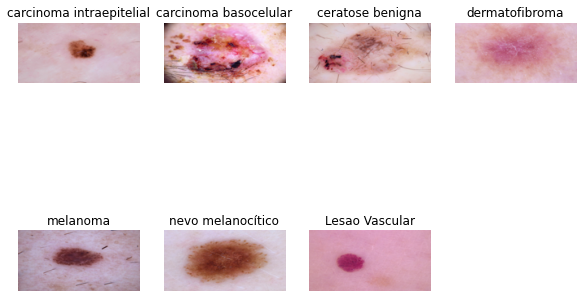

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 7))

rows = 2
columns = 4

Image1 = Image.open('/content/drive/My Drive/Trabalho/dataset/akiec/ISIC_0024418.jpg').resize((150,75))
Image2 = Image.open('/content/drive/My Drive/Trabalho/dataset/bcc/ISIC_0024457.jpg').resize((150,75))
Image3 = Image.open('/content/drive/My Drive/Trabalho/dataset/bkl/ISIC_0024426.jpg').resize((150,75))
Image4 = Image.open('/content/drive/My Drive/Trabalho/dataset/df/ISIC_0025594.jpg').resize((150,75))
Image5 = Image.open('/content/drive/My Drive/Trabalho/dataset/mel/ISIC_0024410.jpg').resize((150,75))
Image6 = Image.open('/content/drive/My Drive/Trabalho/dataset/nv/ISIC_0024317.jpg').resize((150,75))
Image7 = Image.open('/content/drive/My Drive/Trabalho/dataset/vasc/ISIC_0025596.jpg').resize((150,75))

fig.add_subplot(rows, columns, 1)

plt.imshow(Image1)
plt.axis('off')
plt.title("carcinoma intraepitelial")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("carcinoma basocelular")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("ceratose benigna")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("dermatofibroma")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("melanoma")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(Image6)
plt.axis('off')
plt.title("nevo melanocítico")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 7)
  
# showing image
plt.imshow(Image7)
plt.axis('off')
plt.title("Lesao Vascular")

In [ ]:

##from keras.preprocessing.image import img_to_array, array_to_img
##from keras.preprocessing import image

##datagen = ImageDataGenerator(horizontal_flip=True, zoom_range=0.3, rotation_range=60)
##img = image.load_img('/content/drive/My Drive/Trabalho/dataset_validation_2/akiec/ISIC_0034422.jpg')
##img=image.img_to_array(img)

#display imagem original
#plt.imshow(image.array_to_img(img))
#plt.show()

#reshape the image
#img = img.reshape((1,)+img.shape)

#create datagen
#batch1 = datagen.flow(img, batch_size=1)
#fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

#generate augment images

#for i in range(4):
 # image = batch1[0][0].astype('uint8')
 # plt.imshow(Image.fromarray(image))
 # plt.show()

#model.add(BatchNormalization())
 #####################################

 datagen_train=ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.3, rotation_range=45, fill_mode='nearest', vertical_flip=True)

 train_set = datagen_train.flow_from_directory('/content/drive/My Drive/Trabalho/dataset_validation_2', target_size=(256,256), color_mode='rgb', class_mode='binary', batch_size=64)

 #validation

 datagen_val = ImageDataGenerator(rescale=1./255)
 val_set = datagen_val.flow_from_directory()

In [ ]:
# dataVis = ImageList.from_folder('/content/drive/My Drive/TEES/Trabalho/dataset/')
# dataVis.open(dataVis.items[randint(0,len(dataVis))])

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
# labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
# for i in range (0, len(metadata.dx)):
#   if metadata.dx[i] == 'akiec':
#     metadata.dx[i] = 0
#   elif metadata.dx[i] == 'bcc':
#     metadata.dx[i] = 1
#   elif metadata.dx[i] == 'bkl':
#     metadata.dx[i] = 2
#   elif metadata.dx[i] == 'df':
#     metadata.dx[i] = 3
#   elif metadata.dx[i] == 'mel':
#     metadata.dx[i] = 4
#   elif metadata.dx[i] == 'nv':
#     metadata.dx[i] = 5
#   elif metadata.dx[i] == 'vasc':
#     metadata.dx[i] = 6


In [ ]:
# # y = metadata.dx.to_numpy(dtype = int)
# X_train, X_test, y_train, y_test = train_test_split(data, test_size = 0.3, random_state = 0)

# print('Total de imagens no dataset de treino:', len(X_train))
# print('Total de imagens no dataset de teste:', len(X_test))

In [ ]:
# y = tf.convert_to_tensor(y)
# type(y)

In [ ]:
# for i in range (0, len(X_train)):
#   if i < len(X_test):
#     X_train[i] = np.array(X_train)
#     X_train[i] = tf.convert_to_tensor(X_train[i])
#     X_test[i] = np.array(X_train)
#     X_test[i] = tf.convert_to_tensor
#   else:
#     X_train[i] = np.array(X_train)
#     X_train[i] = tf.convert_to_tensor(X_train[i])

Definimos a rede neural com duas camadas de convolução com ativação *relu* e duas camadas de *MaxPooling*, planificamos os dados e adicionamos uma camada *Dense* com ativação *relu* e outra camada *Dense* com ativação *Sigmoid* que será a saida da rede.

A escolha da saida em *sigmoid* se deve ao fato de sua saída ser sempre em porcentagem, variando de 0 a 1.

In [ ]:
###
# model = Sequential()

# model.add(Conv2D(filters=32,padding='same',kernel_size=(3,3),kernel_initializer='he_normal',input_shape=(256,256,3)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2),padding='same',strides=2))

# model.add(Conv2D(filters=64,kernel_size=(3,3),kernel_initializer='he_normal',padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2),padding='same',strides=2))
# model.add(Dropout(0.3))

# model.add(Conv2D(filters=128,kernel_initializer='he_normal',kernel_size=(3,3),padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2),padding='same',strides=2))
# model.add(Dropout(0.35))

# model.add(Flatten())
# model.add(Dense(units=256,activation='relu'))
# model.add(Dense(units=512,activation='relu'))

# model.add(Dense(units=1,activation='sigmoid'))

cnn = tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='softmax', input_shape=[255, 255, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='softmax'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='softmax'))

cnn.add(tf.keras.layers.Dense(units=7, activation='sigmoid'))


Compilamos a rede neural, definindo o ativador, a função de perda e a métrica a ser avaliada

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Treinamento do modelo

In [ ]:
cnn.fit(x = data, validation_data = data_val, epochs = 25)

Epoch 1/25
314/314 [==============================] - 5640s 18s/step - loss: 0.5442 - accuracy: 0.6666 - val_loss: 0.4722 - val_accuracy: 0.6321
Epoch 2/25
314/314 [==============================] - 886s 3s/step - loss: 0.4157 - accuracy: 0.6700 - val_loss: 0.3848 - val_accuracy: 0.6321
Epoch 3/25
314/314 [==============================] - 881s 3s/step - loss: 0.3485 - accuracy: 0.6700 - val_loss: 0.3386 - val_accuracy: 0.6321
Epoch 4/25
314/314 [==============================] - 882s 3s/step - loss: 0.3120 - accuracy: 0.6700 - val_loss: 0.3134 - val_accuracy: 0.6321
Epoch 5/25
314/314 [==============================] - 879s 3s/step - loss: 0.2915 - accuracy: 0.6700 - val_loss: 0.2992 - val_accuracy: 0.6321
Epoch 6/25
314/314 [==============================] - 879s 3s/step - loss: 0.2794 - accuracy: 0.6700 - val_loss: 0.2909 - val_accuracy: 0.6321
Epoch 7/25
314/314 [==============================] - 877s 3s/step - loss: 0.2720 - accuracy: 0.6700 - val_loss: 0.2860 - val_accuracy: 0.63

KeyboardInterrupt: ignored

Predição de uma imagem, baseado no modelo desenvolvido.

In [ ]:
dir = '/content/drive/My Drive/TEES/Trabalho/ISIC2018_Task3_Test_Images/'
result = np.zeros((2000, 7))
j = 0
for i in os.listdir(dir):
  test_image = image.load_img(dir+i, target_size = (255, 255))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result[j] = cnn.predict(test_image)
  j += 1
  data_val.class_indices
  if result[j][0] == 1:
    print('Actinic keratoses and intraepithelial carcinoma(sun burn - Benign)')
  elif result[j][1] == 1:
    print('Basal Cell Carcinoma (Malign)')
  elif result[j][2] == 1:
    print('Benign Keratosis-like Lesions (Benign)')
  elif result[j][3] == 1:
    print('Dermatofibroma (Benign)')
  elif result[j][4] == 1:
    print('Melanoma (Malign)')
  elif result[j][5] == 1:
    print('Melanocytic Nevi (Benign)')
  elif result[j][6] == 1:
    print('Vascular Lesions (Benign)')

NameError: ignored